<div class="alert alert-block alert-warn">

# Data Prep and Cleaning
    
## Objectives:
In this exercise you will:
- Load data from csv file into a DataFrame Object
- Inspect the data
- Clean the data
- Prepare data for analysis
    
### Code Notes:
- December 2021:Written by Sharon Dill, testing by Edward Arroyo
- April 2022 Edits by sd
- fixed unclosed div tag
- changed imputeAge to isna
- changed wording on some questions
</div>

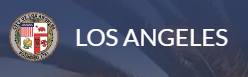 <br>
Many states, counties and cities in the U.S. have web sites where they make data available. The data used for this homework was retrieved from the Los Angeles city link provided below. <br>

https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

## Data Dictionary - fields available in the csv file

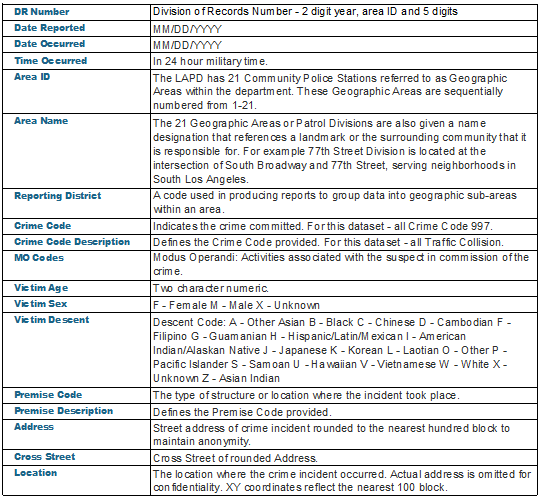

In [1]:
# load libraries
import pandas as pd
import numpy as np

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# ------------------------------------------------------
# read in file
# ------------------------------------------------------
df = pd.read_csv("Traffic_Collision_Data.csv")

# look at the first 5 records
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [3]:
# look at the fields and data types
df.info()

# see null count
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569389 entries, 0 to 569388
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               569389 non-null  int64  
 1   Date Reported           569389 non-null  object 
 2   Date Occurred           569389 non-null  object 
 3   Time Occurred           569389 non-null  int64  
 4   Area ID                 569389 non-null  int64  
 5   Area Name               569389 non-null  object 
 6   Reporting District      569389 non-null  int64  
 7   Crime Code              569389 non-null  int64  
 8   Crime Code Description  569389 non-null  object 
 9   MO Codes                482030 non-null  object 
 10  Victim Age              486086 non-null  float64
 11  Victim Sex              560283 non-null  object 
 12  Victim Descent          559389 non-null  object 
 13  Premise Code            568427 non-null  float64
 14  Premise Description 

DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  87359
Victim Age                83303
Victim Sex                 9106
Victim Descent            10000
Premise Code                962
Premise Description         963
Address                       0
Cross Street              27153
Location                      0
dtype: int64

### Observations from first five records and .info()
- DR Number should be unique
- Date Reported and Date Occurred are mm/dd/yyyy - not Date fields, but Objects
- Is Crime Code all 997?
- Is Crime Code Description all TRAFFIC COLLISION?
- MO Codes are more than one in the field separated by a space. What do they mean?
- Victim age is a float and there are nulls
- Victim Descent is one character code 
- Are Premise code and Premise Description all the same?
- Location has lat/long in same field separated by comma 



### What to do with the data?

The cleaning and prepping of any data depends on the purpose of the project. Below are some items that we want to analyze with this data:
- Has Los Angeles traffic incidents increased or decreased over time?
- With the Covid pandemic in play most of 2020 and some of 2021, is there a decrease in traffic accidents in this time?
- How do the different areas in L.A. differ in accidents?
- Does the number of traffic accidents vary by Age? By Gender? By Descent?

This week the focus is on cleaning and prepping data and in another Exercise this quarter, you will be answering these questions.

In [4]:
# view data without a scroll bar
print(df.head())

   DR Number Date Reported Date Occurred  Time Occurred  Area ID   Area Name  \
0  190319651    08/24/2019    08/24/2019            450        3   Southwest   
1  190319680    08/30/2019    08/30/2019           2320        3   Southwest   
2  190413769    08/25/2019    08/25/2019            545        4  Hollenbeck   
3  190127578    11/20/2019    11/20/2019            350        1     Central   
4  190319695    08/30/2019    08/30/2019           2100        3   Southwest   

   Reporting District  Crime Code Crime Code Description  \
0                 356         997      TRAFFIC COLLISION   
1                 355         997      TRAFFIC COLLISION   
2                 422         997      TRAFFIC COLLISION   
3                 128         997      TRAFFIC COLLISION   
4                 374         997      TRAFFIC COLLISION   

                             MO Codes  Victim Age Victim Sex Victim Descent  \
0            3036 3004 3026 3101 4003        22.0          M              H   


In [5]:
# Are there any duplicates
df['DR Number'].nunique()

# comparing rows to each other shows there are duplicates
df.duplicated().sum()

566747

2642

### Using Pandas documentation

In this notebook, you will see links to Pandas documentation.  Even though you may be familiar with the code being shown, it is worth revisiting the documentation to see if there are other features availabe that could be useful.
<br>

.value_counts is very commonly used, but what parameters are available that you have not used yet?
<br>

<i> Reference: # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html</i>

In [6]:
# Isolate year to see what is included in the data
# Note that we are creating a new column in the dataframe
df['Year'] = pd.to_datetime(df['Date Occurred']).dt.year

# sort by year
df['Year'].value_counts().sort_index(ascending = True)

2010    45341
2011    45500
2012    45592
2013    45246
2014    47166
2015    52754
2016    56826
2017    57996
2018    57438
2019    56880
2020    42567
2021    16083
Name: Year, dtype: int64

In [7]:
# Area Name looks good - not sure about Reporting District
df['Area Name'].value_counts()

# Over 1000 different reporting districts
df['Reporting District'].nunique()
df['Reporting District'].value_counts()

77th Street    37822
Southwest      33550
Wilshire       32133
N Hollywood    29997
West LA        29927
Olympic        29829
Pacific        29625
Newton         29112
Van Nuys       28373
Devonshire     27837
West Valley    27510
Hollywood      27495
Northeast      25465
Mission        24936
Southeast      24605
Topanga        24235
Central        23314
Rampart        21437
Harbor         21430
Hollenbeck     20678
Foothill       20079
Name: Area Name, dtype: int64

1332

645     2574
1494    2364
1309    2274
111     2228
646     2224
        ... 
973        1
694        1
1697       1
962        1
2199       1
Name: Reporting District, Length: 1332, dtype: int64

In [8]:
# all the same, we can drop these columns later
df['Crime Code'].value_counts()
df['Crime Code Description'].value_counts()

997    569389
Name: Crime Code, dtype: int64

TRAFFIC COLLISION    569389
Name: Crime Code Description, dtype: int64

NaN     83303
30.0    16710
25.0    15309
27.0    13654
28.0    13550
        ...  
10.0       50
11.0       46
96.0       45
98.0       39
97.0       35
Name: Victim Age, Length: 91, dtype: int64

count    486086.000000
mean         41.227268
std          16.375172
min          10.000000
25%          28.000000
50%          38.000000
75%          51.000000
max          99.000000
Name: Victim Age, dtype: float64

<AxesSubplot:>

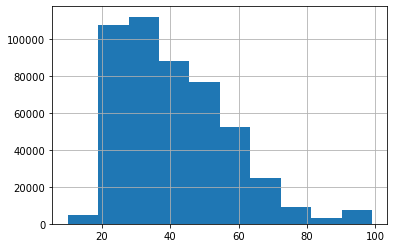

In [9]:
#  null ages and there is some dirty data in ages
df['Victim Age'].value_counts(dropna = False) #will show NaN too

# ten year old driver!
df['Victim Age'].describe()

df['Victim Age'].hist()

### Los Angeles 2020 census data


<div>
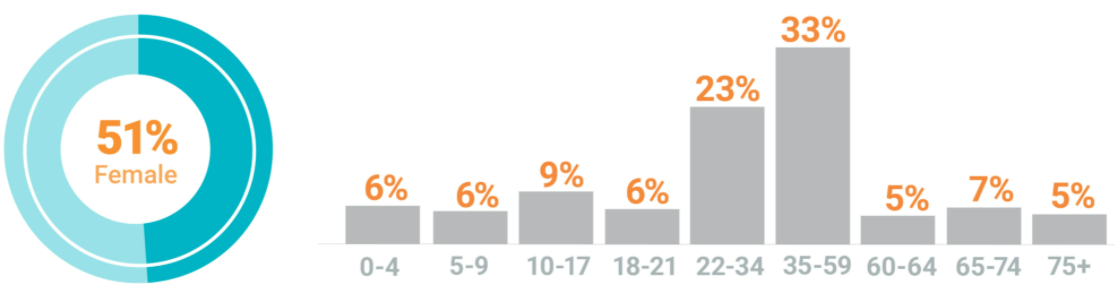

https://planning.lacity.org/resources/demographics
</div>

<AxesSubplot:>

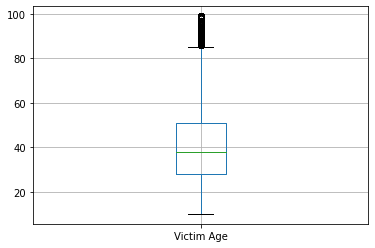

In [10]:
# visually look at data
df.boxplot(column = 'Victim Age')


### Victim Age analysis

- The histogram shows a blip near 100
- The boxplot shows potential outliers at the higher end of age
- After running the cell below, you can see that the age of 99 appears to be dirty data.  Since there are 39 people that are 98 years old, there are bound to be valid 99 years olds, but we don't know which ones, so we will eliminate 99 year olds from our data.

In [11]:
# create a subset of data to check out the ages
temp = df[df['Victim Age'] > 90]
len(temp)
temp['Victim Age'].value_counts()

7693

99.0    7218
91.0     101
92.0      90
94.0      57
95.0      55
93.0      53
96.0      45
98.0      39
97.0      35
Name: Victim Age, dtype: int64

In [12]:
# show data before delete of 7218 records
df.shape

# eliminate records
df = df[df['Victim Age'] != 99]

# check shape after elimination
df.shape

(569389, 19)

(562171, 19)

In [13]:
# look at victim gender values
df['Victim Sex'].value_counts(dropna = False)

# what is the precentage breakdown? Use normalize = True
df['Victim Sex'].value_counts(normalize = True, dropna = False)

# X is Unknown
# H and N are dirty data

M      326740
F      211213
X       15258
NaN      8797
H         152
N          11
Name: Victim Sex, dtype: int64

M      0.581211
F      0.375710
X      0.027141
NaN    0.015648
H      0.000270
N      0.000020
Name: Victim Sex, dtype: float64

### Los Angeles 2020 census data

<div>
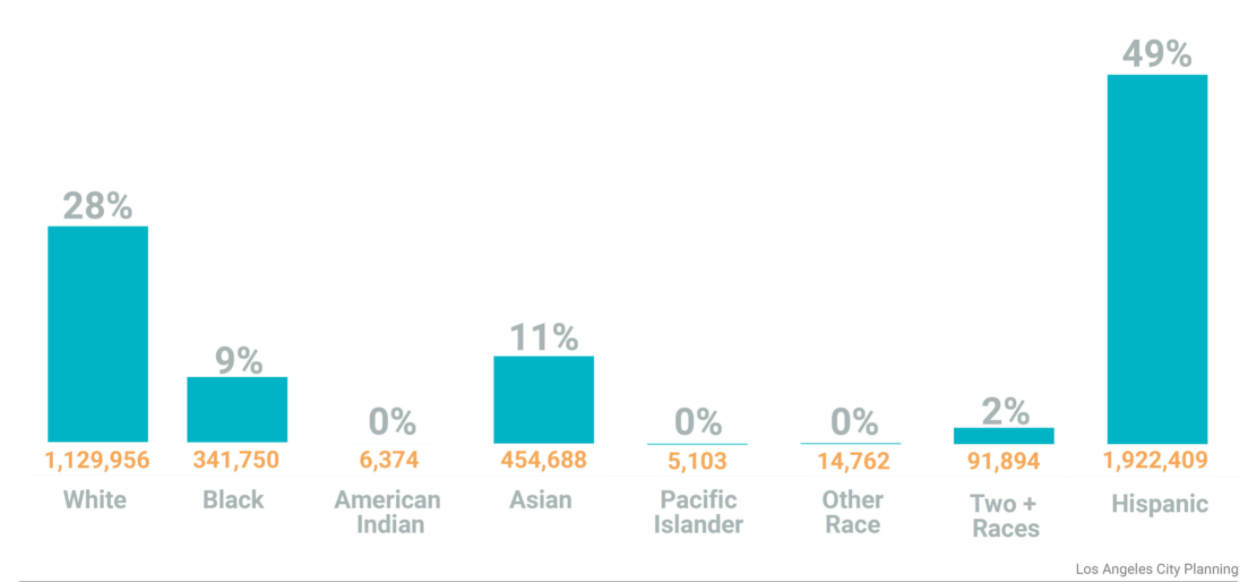
</div>

### Descent Codes used in LA Traffic data 

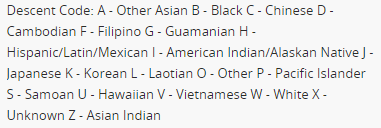

In [14]:
# look at descent by percent
df['Victim Descent'].value_counts(normalize = True, dropna = False)

# and by counts
df['Victim Descent'].value_counts()

H      0.376154
W      0.232102
O      0.139420
B      0.133851
X      0.049316
A      0.036729
NaN    0.017214
K      0.007859
F      0.003001
C      0.001519
U      0.000683
J      0.000589
V      0.000418
P      0.000359
I      0.000315
Z      0.000279
G      0.000085
S      0.000062
D      0.000028
L      0.000012
-      0.000004
Name: Victim Descent, dtype: float64

H    211463
W    130481
O     78378
B     75247
X     27724
A     20648
K      4418
F      1687
C       854
U       384
J       331
V       235
P       202
I       177
Z       157
G        48
S        35
D        16
L         7
-         2
Name: Victim Descent, dtype: int64

In [15]:
# since the majority are the same, we can drop these columns later
df['Premise Code'].value_counts()
df['Premise Description'].value_counts()

101.0    535982
108.0     17565
102.0      2759
103.0       968
104.0       959
          ...  
251.0         1
216.0         1
208.0         1
933.0         1
135.0         1
Name: Premise Code, Length: 120, dtype: int64

STREET                         535982
PARKING LOT                     17565
SIDEWALK                         2759
ALLEY                             968
DRIVEWAY                          959
                                ...  
CHECK CASHING*                      1
AUTO SALES LOT                      1
SWAP MEET                           1
AUTO SUPPLY STORE*                  1
MTA PROPERTY OR PARKING LOT         1
Name: Premise Description, Length: 119, dtype: int64

In [16]:
# have some null locations. Lat and Long are separated by a comma.
df['Location'].value_counts()

(0.0, 0.0)              668
(33.9892, -118.3089)    583
(34.2012, -118.4662)    527
(33.9601, -118.2827)    519
(34.2216, -118.4488)    510
                       ... 
(34.2542, -118.4294)      1
(34.1975, -118.512)       1
(34.1776, -118.4072)      1
(33.9864, -118.4151)      1
(34.2495, -118.3707)      1
Name: Location, Length: 49248, dtype: int64

<div class="alert alert-block alert-info">
    
## Requirements:
Answer the homework questions below.  Add cells as needed. Make sure all cells are run before you download to HTML.<br>
    
**NOTE that many questions have multiple steps to complete.**
</div>

<div class="alert alert-block alert-warning"> 
    <b> Requirement 1:   </b> Drop all unneeded columns: Date Reported, Area ID, Crime Code, Crime Code Description, Premise Code, Premise Description, Address and Cross Street. You should end up with 11 columns.<br>

Show the dataframe shape before deleting columns and after deleting columns.<br>
    
<i> Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html </i>
</div>

In [17]:
col = ['Date Reported', 'Area ID', 'Crime Code', 
      'Crime Code Description', 'Premise Code', 'Premise Description', 'Address', 'Cross Street']
df.shape
df.drop(columns = col, inplace = True)
df.shape

(562171, 19)

(562171, 11)

<div class="alert alert-block alert-warning"> 
<b> Requirement 2:   </b> Drop the duplicates.<br>
    

Show the shape of your dataframe before the drop and after the drop. Your dataframe should decrease by 2594 records.
    
<i> Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html </i>
</div>

In [18]:
z = df
id(z)
id(df)
# these are the same object
# working on a slice of an object - SettingwithCopyWarning:

1845549317952

1845549317952

In [19]:
x = df.copy()
id(x)
id(df)
# two different objects. original stays intact

1845549316848

1845549317952

In [20]:
# one way to drop focusing on a specific column

x.shape

x.drop_duplicates(subset = "DR Number",
                 keep = "first", inplace = True)
x.shape

(562171, 11)

(559577, 11)

In [21]:
# no focus no specific column 
df.shape
df_new = df.drop_duplicates()
df_new.shape
id(df)
id(df_new)

(562171, 11)

(559577, 11)

1845549317952

1845604008000

<div class="alert alert-block alert-warning"> 
<b> Requirement 3:   </b> Rename columns to make them more clear and to prepare them for being loaded into a SQL database:<br>
    
1. Rename DR Number to DR_Number
2. Date Occurred to Date
3. Area Name to Division
4. Victim Age to Age
5. Victim Sex to Gender
6. Victim Descent to Descent
7. MO Codes to MO_Codes
8. Reporting District to Reporting_District
    

After you have completed the rename, show your dataframe with .info() to show the changes.

<i> Reference:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html </i>

</div>

In [23]:
df_new = df_new.rename(columns = {'DR Number': 'DR_Number',
                                 'Date Occurred': 'Date',
                                 'Area Name': 'Division',
                                 'Victim Age': 'Age',
                                 'Victim Sex': 'Gender',
                                 'Victim Descent': 'Descent',
                                 'MO Codes': 'MO_Codes',
                                 'Reporting District': 'Reporting_District'})
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559577 entries, 0 to 566746
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           559577 non-null  int64  
 1   Date                559577 non-null  object 
 2   Time Occurred       559577 non-null  int64  
 3   Division            559577 non-null  object 
 4   Reporting_District  559577 non-null  int64  
 5   MO_Codes            473963 non-null  object 
 6   Age                 476632 non-null  float64
 7   Gender              550807 non-null  object 
 8   Descent             549933 non-null  object 
 9   Location            559577 non-null  object 
 10  Year                559577 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 51.2+ MB


<div class="alert alert-block alert-warning"> 
<b> Requirement 4:   </b> Create new columns into your dataframe:<br>
    
1. Create a month field from Date field
2. Create a day field from Date field
3. Create an hour field from Time Occurred (can handle mathematically or as a string)
4. Drop Time Occured field
5. We will keep the Date field as it might be useful in our analysis later.


Show your dataframe with .info() and .head().
    
</div>

In [24]:
df_new['Month'] = pd.to_datetime(df_new['Date']).dt.month
df_new['Day'] = pd.to_datetime(df_new['Date']).dt.day

df_new['Hour'] = df_new['Time Occurred']//100
# df_new['Hour'] = df_new['Time Occurred'].apply(lambda x:x//100)
# df_new['Hour'] = df_new['Time Occurred'].astype(str).str(:-2)
# df_new['Hour'] = (df_new['Time Occurred']/100).astype(int)
# df_new['Hour'] =(df_new['Time Occurred']//100).astype(int)
# df_new['Hour'] = df_new['Time Occurred'].floordiv(100)
# df_new['Hour'] = pd.to_datetime(df['Time Occurred'], format = '%H', exact=False).dt.strftime('%H')

df_new.drop(columns = ['Time Occurred'], inplace = True)
df_new.info()
df_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559577 entries, 0 to 566746
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           559577 non-null  int64  
 1   Date                559577 non-null  object 
 2   Division            559577 non-null  object 
 3   Reporting_District  559577 non-null  int64  
 4   MO_Codes            473963 non-null  object 
 5   Age                 476632 non-null  float64
 6   Gender              550807 non-null  object 
 7   Descent             549933 non-null  object 
 8   Location            559577 non-null  object 
 9   Year                559577 non-null  int64  
 10  Month               559577 non-null  int64  
 11  Day                 559577 non-null  int64  
 12  Hour                559577 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 59.8+ MB


,DR_Number,Date,Division,Reporting_District,MO_Codes,Age,Gender,Descent,Location,Year,Month,Day,Hour
0,190319651,08/24/2019,Southwest,356,3036 3004 3026 3101 4003,22.0,M,H,"(34.0255, -118.3002)",2019,8,24,4
1,190319680,08/30/2019,Southwest,355,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,"(34.0256, -118.3089)",2019,8,30,23
2,190413769,08/25/2019,Hollenbeck,422,3101 3401 3701 3006 3030,NaN,M,X,"(34.0738, -118.2078)",2019,8,25,5
3,190127578,11/20/2019,Central,128,0605 3101 3401 3701 3011 3034,21.0,M,H,"(34.0492, -118.2391)",2019,11,20,3
4,190319695,08/30/2019,Southwest,374,0605 4025 3037 3004 3025 3101,49.0,M,B,"(34.0108, -118.3182)",2019,8,30,21


<div class="alert alert-block alert-warning"> 
<b> Requirement 5:   </b> Fix the victim Age. Hint: do the fix to Age in the order listed below. Make sure to run the cell that creates the `imputeAge` field before you do any other changes.
    
1. Show your dataframe before any changes with .info()
2. Replace the nulls with the mean of Age    
3. The ages should be valid driving ages of 16 and over; drop any ages under 16.
4. Convert Age to an integer.
4. Show the Age column with .describe().
    

<i> Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html </i>
    



</div>

In [26]:
# run this cell to create a new field in our dataframe that will track ages we have imputed
# change the dataframe name to match your current dataframe

# if the Age is over 9 then imputeAge will be False, otherwise it will be True
df_new['imputeAge'] = np.where(pd.isna(df_new['Age']), True, False)
df_new.head()
df_new.info()

,DR_Number,Date,Division,Reporting_District,MO_Codes,Age,Gender,Descent,Location,Year,Month,Day,Hour,imputeAge
0,190319651,08/24/2019,Southwest,356,3036 3004 3026 3101 4003,22.0,M,H,"(34.0255, -118.3002)",2019,8,24,4,False
1,190319680,08/30/2019,Southwest,355,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,"(34.0256, -118.3089)",2019,8,30,23,False
2,190413769,08/25/2019,Hollenbeck,422,3101 3401 3701 3006 3030,NaN,M,X,"(34.0738, -118.2078)",2019,8,25,5,True
3,190127578,11/20/2019,Central,128,0605 3101 3401 3701 3011 3034,21.0,M,H,"(34.0492, -118.2391)",2019,11,20,3,False
4,190319695,08/30/2019,Southwest,374,0605 4025 3037 3004 3025 3101,49.0,M,B,"(34.0108, -118.3182)",2019,8,30,21,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 559577 entries, 0 to 566746
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           559577 non-null  int64  
 1   Date                559577 non-null  object 
 2   Division            559577 non-null  object 
 3   Reporting_District  559577 non-null  int64  
 4   MO_Codes            473963 non-null  object 
 5   Age                 476632 non-null  float64
 6   Gender              550807 non-null  object 
 7   Descent             549933 non-null  object 
 8   Location            559577 non-null  object 
 9   Year                559577 non-null  int64  
 10  Month               559577 non-null  int64  
 11  Day                 559577 non-null  int64  
 12  Hour                559577 non-null  int64  
 13  imputeAge           559577 non-null  bool   
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 60.3+ MB


In [28]:
# before
print("---- before fix ----")
df_new.info()

# values = {'Age': 40}
values = {'Age': df_new['Age'].mean()}
print()
print(f'Mean value used: {values}')
print()

df_new = df_new.fillna(value = values)
# df_new['Age'] = df_new['Age'].fillna(df_new['Age'].mean())

# valid ages
df_new = df_new[df_new['Age'].between(16,98)]

# convert to int
df_new['Age'] = df_new['Age'].astype(int)

#after data fix
print("---- after fix ----")
df_new.info()




---- before fix ----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 559577 entries, 0 to 566746
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           559577 non-null  int64  
 1   Date                559577 non-null  object 
 2   Division            559577 non-null  object 
 3   Reporting_District  559577 non-null  int64  
 4   MO_Codes            473963 non-null  object 
 5   Age                 476632 non-null  float64
 6   Gender              550807 non-null  object 
 7   Descent             549933 non-null  object 
 8   Location            559577 non-null  object 
 9   Year                559577 non-null  int64  
 10  Month               559577 non-null  int64  
 11  Day                 559577 non-null  int64  
 12  Hour                559577 non-null  int64  
 13  imputeAge           559577 non-null  bool   
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 60.3+

In [29]:
df_new['Age'].describe()

count    559129.000000
mean         40.321997
std          13.706365
min          16.000000
25%          30.000000
50%          40.000000
75%          49.000000
max          98.000000
Name: Age, dtype: float64

<div class="alert alert-block alert-warning"> 
<b> Requirement 6:   </b> Fix the Gender field. 
    
1. The values should be M, F and X so remove the rows with H, N and null values. 
2. Rename M to Male, F to Female and X to Other.
3. Show value counts for Gender column after the data has been cleaned using 'dropna = False'.
    

<i> Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html </i>


</div>

In [30]:
df_new.shape
gender = ['M','F','X']
df_new = df_new[df_new['Gender'].isin(gender)]
df_new.shape

df_new['Gender'] = df_new['Gender'].replace({'M':'Male',
                                            'F':'Female',
                                            'X':'Other'})
df_new['Gender'].value_counts(dropna = False)

(559129, 14)

(550202, 14)

Male      324885
Female    210125
Other      15192
Name: Gender, dtype: int64

<div class="alert alert-block alert-warning"> 
<b> Requirement 7:   </b> For cleaning the Victim Descent, we will follow the guidelines of Pew Research. 

1. Include C (Chinese), Z (Asian Indian), F (Filipino), V (Vietnamese), K (Korean), J (Japanese), D (Cambodian), L (Laotion) into **A (Asian)**
2. Change the I, U, G, S, and P into O (Other)
3. Change the - (2 records with a dash) and the NaN into X (Unknown)
4. Rename the values in this column: H is Hispanic, W is White, O is Other, B is Black, X is Unknown and A is Asian
5. Do a values_count() on the Descent field to show the new breakdown using 'dropna = False'.
    
   
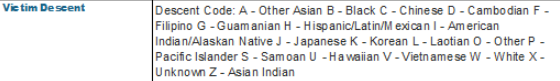 <br>
    
<i> Reference: https://www.pewresearch.org/fact-tank/2021/04/29/key-facts-about-asian-origin-groups-in-the-u-s/ </i>

</div>

In [34]:
df_new['Descent'].value_counts(dropna = False)
# one way to define Asian but will repeat for each Descent
# df_new['Descent'].replace(['C', 'Z','F', 'V', 'K', 'J', 'D', 'L', 'A'], 'Asian', inplace = True)

df_new['Descent'] = df_new['Descent'].replace({'C':'Asian',
                                              'Z':'Asian',
                                              'F':'Asian',
                                              'V':'Asian',
                                              'K':'Asian',
                                              'J':'Asian',
                                              'D':'Asian',
                                              'L':'Asian',
                                              'I':'Asian',
                                              'U':'Asian',
                                              'G':'Asian',
                                              'S':'Asian',
                                              'P':'Asian',
                                              '-':'X',})

df_new['Descent'] = df_new['Descent'].fillna('X')
df_new['Descent'] = df_new['Descent'].replace({'H':'Hispanic',
                                             'W':'White',
                                             'O':'Other',
                                             'B':'Black',
                                             'X':'Unknown',
                                             'A':'Asian'})
df_new['Descent'].value_counts(dropna = False)


# Notably, my counts look a bit different than Dr. Dill's counts do in her answer key video, but I think I'll overlook that since I'm hoping that they'll provide a new input CSV file
# and since it's possible that her tutorial video is really old and they're using a different dataset these days

H        210118
W        129838
O         77958
B         74787
X         27592
A         20547
Asian      8193
NaN         885
P           202
G            46
S            34
-             2
Name: Descent, dtype: int64

Hispanic    210118
White       129838
Other        77958
Black        74787
Asian        29022
Unknown      28479
Name: Descent, dtype: int64

<div class="alert alert-block alert-warning"> 
<b> Requirement 8:  </b> The Location field contains Latitude and Longitude separated by a comma. 
    
1. Create two new fields in the your dataframe - one for Latitude and one for Longitude. Neither of these fields should contain a parenthesis or comma from the original field. 
2. Once you have these two new columns, drop the Location field.
3. Drop the rows that have 0.0 for both Latitude and Longitudes.  You can do this before or after you split the field.
4. Show your dataframe with .info to show the new columns.
5. Run .head() on your dataframe to show the values in the new columns.
    

<i> Reference: https://docs.python.org/2.5/lib/string-methods.html </i>


</div>

In [35]:
df_new.shape
df_new = df_new[df_new['Location'] != "(0.0, 0.0)"]
df_new.shape
df_new['Location'] = df_new['Location'].str.lstrip('(')
df_new['Location'] = df_new['Location'].str.rstrip(')')
#df_new['Location'] = df_new['Location'].str.strip('()') # both at once

# drop Location
df_new.drop(columns = ['Location'], inplace = True)
df_new.head()

(550202, 14)

(549547, 14)

,DR_Number,Date,Division,Reporting_District,MO_Codes,Age,Gender,Descent,Year,Month,Day,Hour,imputeAge
0,190319651,08/24/2019,Southwest,356,3036 3004 3026 3101 4003,22,Male,Hispanic,2019,8,24,4,False
1,190319680,08/30/2019,Southwest,355,3037 3006 3028 3030 3039 3101 4003,30,Female,Hispanic,2019,8,30,23,False
2,190413769,08/25/2019,Hollenbeck,422,3101 3401 3701 3006 3030,40,Male,Unknown,2019,8,25,5,True
3,190127578,11/20/2019,Central,128,0605 3101 3401 3701 3011 3034,21,Male,Hispanic,2019,11,20,3,False
4,190319695,08/30/2019,Southwest,374,0605 4025 3037 3004 3025 3101,49,Male,Black,2019,8,30,21,False


### Last thing to do:
Split out the MO_Codes into its own dataframe with only two fields: DR_Number and MO_Codes. The code has been provided to you and all you have to do is run the cells.

### Note - this code uses df for the dataframe.  You can change it to match your dataframe name.

In [36]:
# looking at MO codes shows many codes per incident
# let's separate these out and put into a separate dataframe for later use
df_new['MO_Codes'].head(10)

0              3036 3004 3026 3101 4003
1    3037 3006 3028 3030 3039 3101 4003
2              3101 3401 3701 3006 3030
3         0605 3101 3401 3701 3011 3034
4         0605 4025 3037 3004 3025 3101
5         3101 3401 3701 3003 3025 3029
6         0605 3037 3003 3026 3029 3101
7                   4025 3037 3002 3028
8              3036 4025 3004 3026 3101
9              3101 3401 3701 3006 3030
Name: MO_Codes, dtype: object

In [37]:
# let's use pandas explode to separate field: 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
mo = df_new[['DR_Number','MO_Codes']]
mo.shape
mo = mo.dropna()
mo.shape

mo["MO_Codes"] = mo["MO_Codes"].str.split()
mo_df = mo.explode("MO_Codes")
mo_df.head(10)
mo_df["MO_Codes"].value_counts()
mo_df.info()

(549547, 2)

(465075, 2)

,DR_Number,MO_Codes
0,190319651,3036
0,190319651,3004
0,190319651,3026
0,190319651,3101
0,190319651,4003
1,190319680,3037
1,190319680,3006
1,190319680,3028
1,190319680,3030
1,190319680,3039


3101    402493
3701    327780
3401    327721
3004    242872
3037    212281
         ...  
0446         1
1207         1
1214         1
0371         1
0450         1
Name: MO_Codes, Length: 330, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033153 entries, 0 to 566746
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   DR_Number  int64 
 1   MO_Codes   object
dtypes: int64(1), object(1)
memory usage: 69.4+ MB


Now that MO_Codes is parsed out into its own dataframe, drop MO_Codes from the original dataframe.  Show the final main dataframe with .info().

In [39]:
df_new.drop(columns = ['MO_Codes'], inplace = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549547 entries, 0 to 566746
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   DR_Number           549547 non-null  int64 
 1   Date                549547 non-null  object
 2   Division            549547 non-null  object
 3   Reporting_District  549547 non-null  int64 
 4   Age                 549547 non-null  int32 
 5   Gender              549547 non-null  object
 6   Descent             549547 non-null  object
 7   Year                549547 non-null  int64 
 8   Month               549547 non-null  int64 
 9   Day                 549547 non-null  int64 
 10  Hour                549547 non-null  int64 
 11  imputeAge           549547 non-null  bool  
dtypes: bool(1), int32(1), int64(6), object(4)
memory usage: 48.7+ MB


### Save clean files to new csv files for later use

### Note - change this code to match your dataframe name

In [40]:
# write out the clean file to be used in Ex 2 Introduction to SQL
df_new.to_csv('Final Traffic.csv', index = False)

In [41]:
# write out the clean file to be used in Ex 2 Introduction to SQL
mo_df.to_csv('MO per accident.csv', index = False)